# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [4]:
data.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [6]:
data.iloc[:,-1].value_counts()

0    28432
1      246
Name: Class, dtype: int64

데이터가 정상인게 더 많아 불균형함을 알 수 있다.

### 테스트, 학습용 데이터 나누기

In [7]:
from sklearn.model_selection import train_test_split

In [13]:
def get_train_test_dataset(df=None):
    df_copy=df.copy()
    X_features=df_copy.iloc[:,:-1]
    y_target=df_copy.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,random_state=0,stratify=y_target)
    
    return X_train,X_test,y_train,y_test

In [14]:
X_train, X_test, y_train, y_test=get_train_test_dataset(data)

In [16]:
print('학습 데이터 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 비율
0    99.14317
1     0.85683
Name: Class, dtype: float64
테스트 데이터 비율
0    99.139935
1     0.860065
Name: Class, dtype: float64


데이터가 불균형하므로 Stratified방식으로 나눠 class의 분포가 균등하게 나눠지도록 함

### 평가(정확도, 정밀도, 재현율, f1 score, roc-auc score)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
    
def model_train_eval(model, feature_train=None, feature_test=None, target_train=None, target_test=None):
    model.fit(feature_train, target_train)
    pred=model.predict(feature_test)
    pred_proba=model.predict_proba(feature_test)[:,1]

    confusion=confusion_matrix(target_test,pred)
    accuracy=accuracy_score(target_test,pred)
    precision=precision_score(target_test,pred)
    recall=recall_score(target_test,pred)
    f1=f1_score(target_test,pred)
    roc_auc=roc_auc_score(target_test,pred_proba)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy,precision,recall,f1,roc_auc))

In [18]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr =LogisticRegression()
model_train_eval(lr, X_train, X_test, y_train, y_test)

정확도: 0.9979, 정밀도: 0.9516, 재현율: 0.7973, F1: 0.8676, AUC: 0.9859


0보단 1를 예측하는 것이 중요하다 따라서 정확도는 큰 의미를 갖지 못한다.         
불균형한 분포를 이상치 데이터 제거를 통해 평가해본다.       
IQR방법을 사용한다.

### 이상치 제거 

<AxesSubplot: >

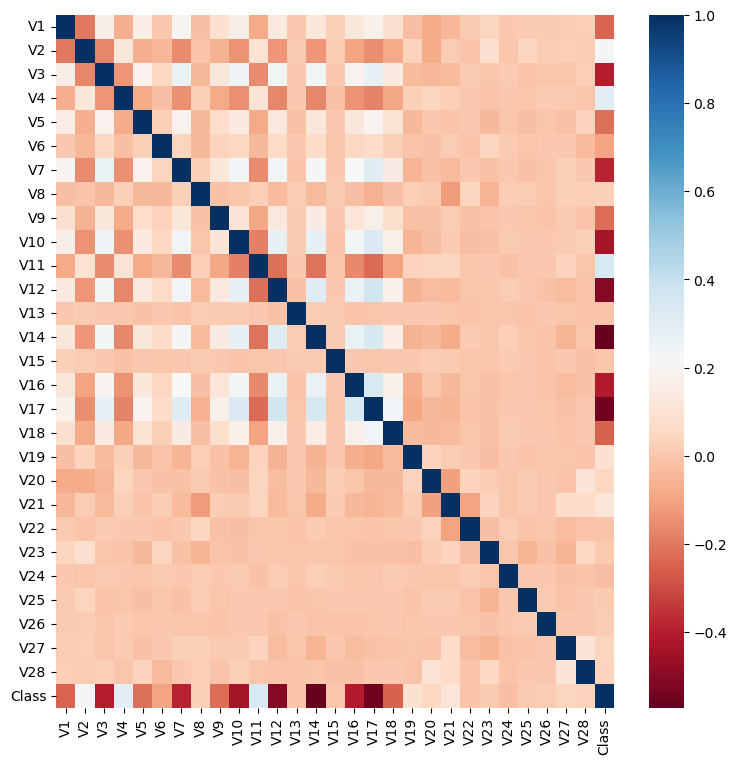

In [24]:
plt.figure(figsize=(9,9))
corr=data.corr()
sns.heatmap(corr,cmap='RdBu')

V12, V14, V17이 음의 상관관계가 제일 높으므로 이 이상치를 제거한다.

In [25]:
def outlier(df, col, weight = 5):
    fraud=df[df['Class']==1][col]
    quantile_25=np.percentile(fraud.values,25)
    quantile_75=np.percentile(fraud.values,75)
    
    iqr=quantile_75-quantile_25
    iqr_weighted=iqr*weight
    lowest_val=quantile_25-iqr_weighted
    highest_val=quantile_75+iqr_weighted
    outlier_index=fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

In [27]:
print('v12 이상치 인덱스 : ', outlier(data,'V12',1.5))
print('v14 이상치 인덱스 : ', outlier(data,'V14',1.5))
print('v17 이상치 인덱스 : ', outlier(data,'V17',1.5))

v12 이상치 인덱스 :  Int64Index([15432], dtype='int64')
v14 이상치 인덱스 :  Int64Index([11556], dtype='int64')
v17 이상치 인덱스 :  Int64Index([], dtype='int64')


In [28]:
data.drop(outlier(data,'V12',1.5))
data.drop(outlier(data,'V14',1.5))
data.drop(outlier(data,'V17',1.5))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28673,2.063299,0.015015,-1.042161,0.409655,-0.069835,-1.198490,0.243507,-0.385099,0.408691,0.047861,...,-0.169749,-0.278942,-0.625629,0.331276,0.070205,-0.269826,0.192509,-0.064914,-0.058058,0
28674,1.264844,-1.228616,1.579098,-0.204514,-1.958881,0.546495,-1.764072,0.470377,1.002209,0.274005,...,-0.125401,0.144909,0.718615,-0.038493,0.103706,0.341100,-0.009807,0.089794,0.019848,0
28675,2.072659,0.190048,-1.759688,0.378909,0.556826,-0.769874,0.246899,-0.274561,0.380960,-0.405147,...,-0.084170,-0.361188,-0.910782,0.304372,0.401511,-0.212440,0.177857,-0.058961,-0.029035,0
28676,-0.690637,1.342271,1.498129,2.049774,1.055691,0.677197,0.855445,-0.467242,-0.681576,1.485542,...,0.030868,0.110939,0.453065,-0.355346,-0.771072,-0.358505,0.101309,-0.849084,-0.312999,0


In [29]:
model_train_eval(lr,X_train,X_test,y_train,y_test)

정확도: 0.9979, 정밀도: 0.9516, 재현율: 0.7973, F1: 0.8676, AUC: 0.9859
